In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/polynomialregressioncsv/polynomial-regression.csv


In [8]:
data = pd.read_csv(os.path.join(dirname, "polynomial-regression.csv"))

In [9]:
data.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [10]:
x = data.iloc[:, 0:1]
x.head()

,araba_fiyat
0,60
1,70
2,80
3,100
4,120


In [12]:
y = data.iloc[:, 1:2]
y.head()

,araba_max_hiz
0,180
1,180
2,200
3,200
4,200


In [13]:
import matplotlib.pyplot as plt

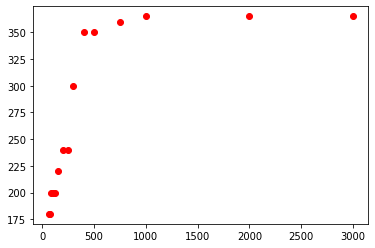

In [14]:
plt.scatter(x.values, y.values, color="red")

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [18]:
x_reg = poly.fit_transform(x.values)
x_reg

array([[1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 7.000e+01, 4.900e+03],
       [1.000e+00, 8.000e+01, 6.400e+03],
       [1.000e+00, 1.000e+02, 1.000e+04],
       [1.000e+00, 1.200e+02, 1.440e+04],
       [1.000e+00, 1.500e+02, 2.250e+04],
       [1.000e+00, 2.000e+02, 4.000e+04],
       [1.000e+00, 2.500e+02, 6.250e+04],
       [1.000e+00, 3.000e+02, 9.000e+04],
       [1.000e+00, 4.000e+02, 1.600e+05],
       [1.000e+00, 5.000e+02, 2.500e+05],
       [1.000e+00, 7.500e+02, 5.625e+05],
       [1.000e+00, 1.000e+03, 1.000e+06],
       [1.000e+00, 2.000e+03, 4.000e+06],
       [1.000e+00, 3.000e+03, 9.000e+06]])

In [19]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [21]:
x_lreg = linear.fit(x_reg, y)

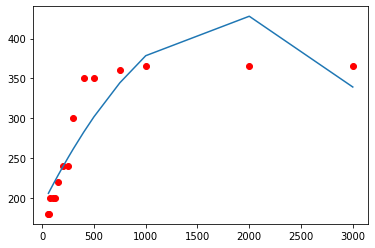

In [25]:
plt.scatter(x.values, y.values, color="red")
plt.plot(x.values, linear.predict(poly.fit_transform(x.values)))
plt.show()

In [28]:
poly3 = PolynomialFeatures(degree=3)
x_reg3 = poly3.fit_transform(x.values)
x_lreg3 = linear.fit(x_reg3, y)

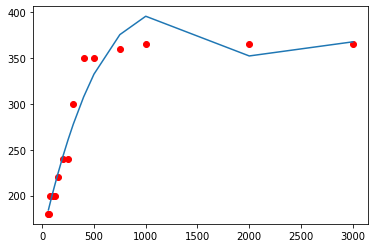

In [30]:
plt.scatter(x.values, y.values, color="red")
plt.plot(x.values, linear.predict(poly3.fit_transform(x.values)))
plt.show()

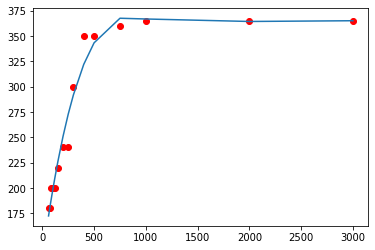

In [31]:
poly4 = PolynomialFeatures(degree=4)
x_reg4 = poly4.fit_transform(x.values)
x_lreg4 = linear.fit(x_reg4, y)
plt.scatter(x.values, y.values, color="red")
plt.plot(x.values, linear.predict(poly4.fit_transform(x.values)))
plt.show()

In [40]:
print(linear.predict(poly4.fit_transform(x.values)))

[[172.48623128]
 [179.02003947]
 [185.40350013]
 [197.72760866]
 [209.47488899]
 [226.04948065]
 [251.01522484]
 [272.86647328]
 [291.83688333]
 [322.0299441 ]
 [343.30417183]
 [367.53882941]
 [366.80291008]
 [364.35608948]
 [365.08772449]]


In [41]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,linear.predict(poly4.fit_transform(x.values))))

r_square score:  0.9694743023124649
